#DESCRIPTION OF THE PROJECT

Food Delivery Cost Analysis Using Python involves evaluating various cost components associated with 

food delivery services to optimize efficiency and profitability. Key components include order value,

delivery fees, commission fees, payment processing fees, discounts, and refunds. The analysis helps in

identifying cost patterns, determining peak order times, assessing the impact of discounts on

profitability, and understanding the relationship between delivery speed and customer satisfaction. 

Tools like Pandas, Matplotlib are typically used for data manipulation, visualization, and analysis.

In [1]:
import pandas as pd

In [2]:
fd = pd.read_csv(r"C:\Users\DELL\Downloads\food delivery costs.csv")

In [3]:
fd.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [4]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


# CLEANING

In [5]:
fd["Order Date and Time"] = pd.to_datetime(fd["Order Date and Time"]) 
fd.info()             #order data and time is changed from object to date and time format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   object        
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    815 non-null    object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory 

In [6]:
fd["Delivery Date and Time"] = pd.to_datetime(fd["Delivery Date and Time"]) 
fd.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    815 non-null    object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

In [7]:
#to divide data into diff parts and the extract the first value from the data i.e.zero index
#for eg if its 50 off Promo then remove off promo just take 50%

In [8]:
a = "15% new user"    
z = a.split()      
z[0]

'15%'

In [9]:
def extract(value):
    a = str(value).split(" ")
    return a[0]

fd["Discounts and Offers"] = fd["Discounts and Offers"].apply(extract)
fd.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5%,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15%,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,nan,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50,130,50,0


In [10]:
#To remove percentage or replace percentage symbol into float value otherwise
#if there is no symbol we can keep it as it is

In [11]:
def removep(value):
    if "%" in value:
        a = value.replace("%","")
        return float(a)    #float coz we want it 
    else:
        return float(value)
    
fd["Discounts and Offers"] = fd["Discounts and Offers"].apply(removep)
fd.head()
        

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5.0,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10.0,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15.0,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50.0,130,50,0


In [12]:
#Standerdise it in one format convert everything into rupee
#whenever the value is less or equal to 15% so we will convert into rupee to get the discount amunt
#In discount offers most of the are 15%,10%,5% so we use less or equal to 15 
#and then divide by 100 and multiply by order value
#and the 50 in the coloumn is not 50% but its 50rs off discount so it is as it


In [13]:
fd.loc[(fd["Discounts and Offers"] <= 15),"Discounts and Offers" ] = (fd["Discounts and Offers"]/100) * fd["Order Value"]
fd.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,95.70,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,98.60,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,140.55,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50.00,130,50,0


In [14]:
#TO REMOVE NAN VALUES replace with zero coz the person didnt recieved any discount

In [15]:
fd["Discounts and Offers"] = fd["Discounts and Offers"].fillna(0)
fd.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,95.70,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,98.60,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,140.55,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0.00,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50.00,130,50,0


In [16]:
#Calculation of cost

In [17]:
fd["Costs"]  = fd["Delivery Fee"] + fd["Discounts and Offers"] + fd["Payment Processing Fee"]
fd.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Costs
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,95.70,150,47,0,142.70
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,98.60,198,23,0,161.60
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,140.55,195,45,0,215.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0.00,146,27,0,77.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50.00,130,50,0,130.00


In [18]:
#Profit

In [19]:
fd["Profit"] = fd["Commission Fee"] - fd['Costs']
fd.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Costs,Profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,95.70,150,47,0,142.70,7.30
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,98.60,198,23,0,161.60,36.40
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,140.55,195,45,0,215.55,-20.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0.00,146,27,0,77.00,69.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50.00,130,50,0,130.00,0.00


In [20]:
fd["Profit"].sum()  #negative coz company is in loss 
                

-5751.85

In [21]:
#What is leading here which is creating more loss

In [22]:
cost_distribution = fd[["Delivery Fee", "Payment Processing Fee", "Discounts and Offers"]].sum()
cost_distribution

Delivery Fee              28620.00
Payment Processing Fee    29832.00
Discounts and Offers      74289.85
dtype: float64

# Data visualisation

In [23]:
import matplotlib.pyplot as plt

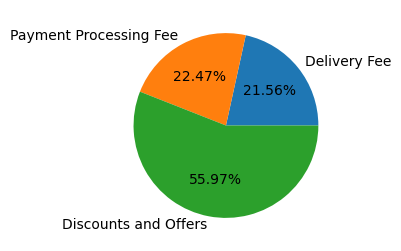

In [24]:
plt.figure(figsize = (3,3))
plt.pie(cost_distribution, labels = cost_distribution.index, autopct = "%1.2f%%")
plt.show()

In [25]:
#we are not in profit so we have to do further to optimisation and forecast our result with help of ML 
#algorithms

In [26]:
#TO show our stalkholder on our buisiness is performing

In [27]:
abc = fd[["Commission Fee", "Costs","Profit"]].sum()
abc

Commission Fee    126990.00
Costs             132741.85
Profit             -5751.85
dtype: float64

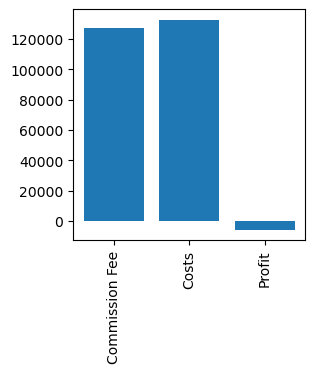

In [28]:
plt.figure(figsize = (3,3))
plt.bar(abc.index, abc)
plt.xticks(rotation = 90)
plt.show()

In [29]:
#IT SHOWS PROFIT IS VERY LESS OR BELOW ZERO

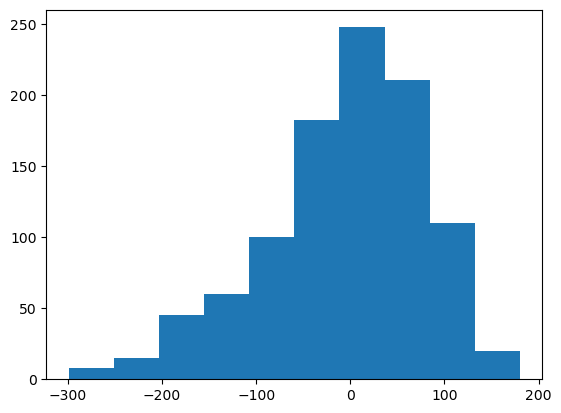

In [30]:
plt.hist(fd["Profit"])
plt.show()


In [31]:
#paymethod methods

In [32]:
pay_counts = fd['Payment Method'].value_counts()
pay_counts

Payment Method
Cash on Delivery    357
Credit Card         337
Digital Wallet      306
Name: count, dtype: int64

In [33]:
color_list=('pink','blue','orange')

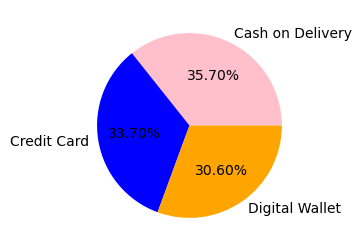

In [34]:
plt.figure(figsize = (3,3))
plt.pie(pay_counts, labels = pay_counts.index, autopct = "%1.2f%%",colors=color_list)
plt.show()

In [35]:
#WE CAN SEE THAT MOST OF THE USERS i.e. 35% ARE CREDIT CARD USERS
#FOLLOWED BY CASH ON DELIVERY AND DIGITAL WALLET 

In [36]:
#WHICH TIME OF THE DAY WE ARE GETTING THE MAX ORDERS

In [37]:
# Extract hour from 'Order Date and Time'
fd['Order Hour'] = fd['Order Date and Time'].dt.hour


In [38]:
# Count of orders per hour
order_counts = fd['Order Hour'].value_counts().sort_index()



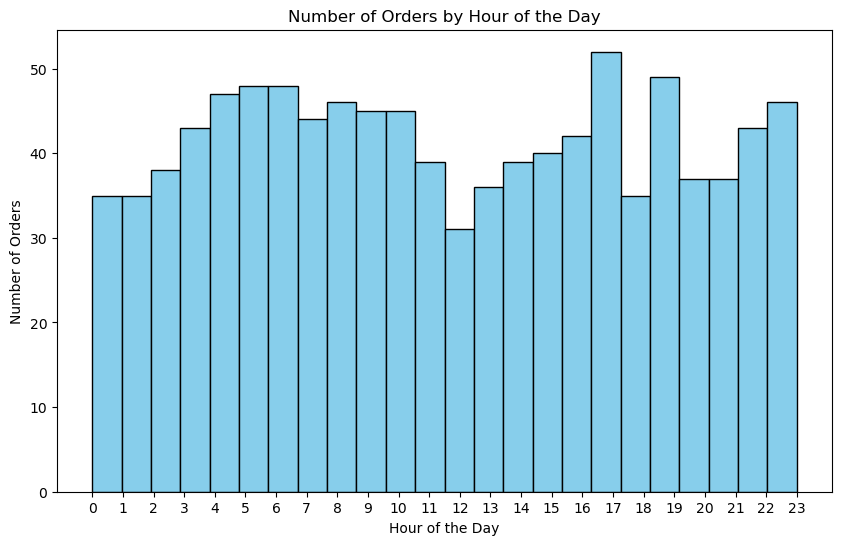

In [39]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(fd['Order Hour'], bins=24, color='skyblue', edgecolor='black')
plt.title('Number of Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.show()

Key Insights:
Early Morning (0:00 - 6:00): Low orders, fewer than 10 per hour.

Morning (6:00 - 12:00): Orders rise, peaking at 40 around 12:00.

Afternoon (12:00 - 18:00): High orders (around 40) from 12:00 to 14:00, then a slight decline but staying above 20.

Evening (18:00 - 24:00): Orders peak at nearly 50 around 20:00, then gradually decrease but remain relatively high until 22:00.

#WHICH DAY OF THE WEEK THEY ARE MAKING MORE ORDERS

In [40]:
# Extract day of the week
fd['Day of Week'] = fd['Order Date and Time'].dt.day_name()



In [41]:
# Count orders by day of the week
order_total = fd['Day of Week'].value_counts().sort_index()


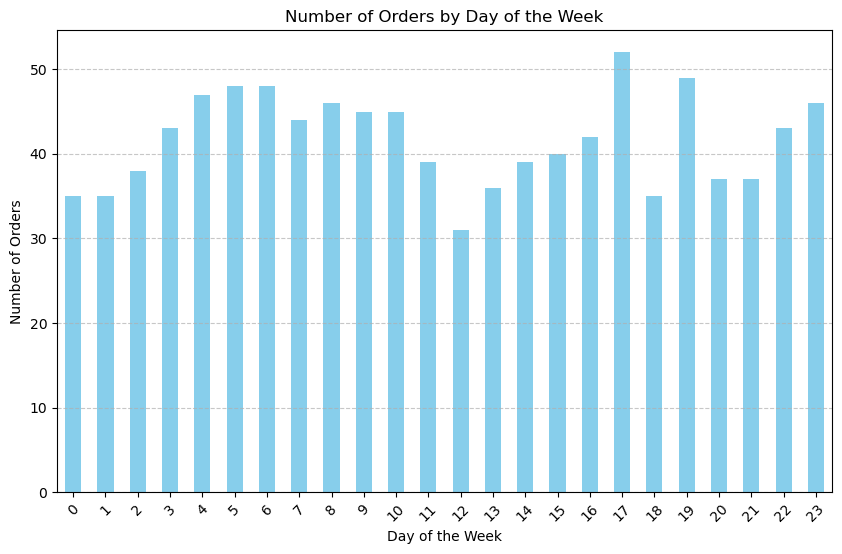

In [42]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
order_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Peak Activity:

The highest number of orders is observed on the 5th, 6th, and 7th days of the month, each with nearly or exactly 50 orders. This suggests increased customer activity during this period, potentially due to early-month spending habits or targeted promotions.

Mid-Month Spike:

Another significant spike in orders occurs around the 17th day of the month. This could indicate mid-month salary credits, special promotions, or other incentives that drive customer engagement.

Low Activity Days:

The 11th, 12th, and 13th days of the month have relatively lower order counts, around 30 orders. This dip might be due to decreased disposable income or fewer promotions during this period.

General Fluctuation:

Throughout the month, the number of orders fluctuates between 30 to 50. The trend shows higher activity in the first week and a notable peak in the middle of the month, with other days showing moderate to low activity.
Strategic Planning:

Businesses can leverage this information to plan promotions and marketing campaigns effectively. For example, increasing advertising or offering discounts during the low-activity days could help balance the order volume throughout the month.
Customer Behavior:

The data suggests that customers are more active at the beginning and middle of the month, possibly due to salary cycles or other financial factors. Understanding this behavior can help in better inventory and resource management.